In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv('TATAMOTORS.csv')

In [16]:
df.shape

(6857, 7)

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,72.436363,72.819626,72.340553,72.819626,53.472778,40703.0
1,1996-01-02,72.819626,73.566986,72.053108,72.398041,53.163208,100975.0
2,1996-01-03,72.398041,72.819626,72.101013,72.158501,52.987305,29744.0
3,1996-01-04,72.158501,72.244736,71.190765,71.612350,52.586254,104889.0
4,1996-01-05,71.612350,71.823151,71.094955,71.353653,52.396275,62620.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6857 non-null   object 
 1   Open       6850 non-null   float64
 2   High       6850 non-null   float64
 3   Low        6850 non-null   float64
 4   Close      6850 non-null   float64
 5   Adj Close  6850 non-null   float64
 6   Volume     6850 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.1+ KB


In [19]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [20]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6850.000000,6850.000000,6850.000000,6850.000000,6850.000000,6.850000e+03
mean,188.302396,191.175619,185.062927,187.998531,181.166588,1.530860e+07
std,155.487696,157.324620,153.335375,155.229675,158.748795,2.064688e+07
min,11.114574,11.631977,11.028340,11.267879,9.099407,0.000000e+00
25%,61.966151,63.151732,60.411547,61.893464,48.176292,5.216568e+06
50%,139.602890,142.461952,136.790710,139.305862,127.234341,9.314398e+06
75%,299.970863,305.194176,294.803192,299.512512,297.624032,1.707449e+07
max,600.212097,605.901123,589.873047,598.134399,597.892273,3.905778e+08


In [21]:
df.duplicated().sum()

0

In [50]:
df.fillna(df.mean(), inplace=True)#to fill in the missing values with the average values

C:\Users\Shrinil\AppData\Local\Temp\ipykernel_14360\1313793124.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)#to fill in the missing values with the average values


In [25]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Performing Descriptive Data Analysis**

In [39]:
#Printing the mean of each feature
for i in df.columns[1:]:
        mean=df[i].mean()
        print(f"Mean of {i}: {mean}")

Mean of Open: 188.30239645021896
Mean of High: 191.1756193810219
Mean of Low: 185.06292728218978
Mean of Close: 187.99853143854014
Mean of Adj Close: 181.16658753255473
Mean of Volume: 15308603.884817518


In [41]:
#Printing the median of each feature
for i in df.columns[1:]:
    median=df[i].median()
    print(f"Median of {i}: {median}")

Median of Open: 139.67955
Median of High: 142.534836
Median of Low: 136.850006
Median of Close: 139.51358
Median of Adj Close: 127.321762
Median of Volume: 9322795.0


In [43]:
#Printing standard deviation of each feature
for i in df.columns[1:]:
    sd=df[i].std()
    print(f"Standard Deviation of {i}: {sd}")

Standard Deviation of Open: 155.40829881735013
Standard Deviation of High: 157.24428533101462
Standard Deviation of Low: 153.25707742381803
Standard Deviation of Close: 155.15040926356482
Standard Deviation of Adj Close: 158.66773253284802
Standard Deviation of Volume: 20636334.54909811


In [46]:
for i in df.columns[1:]:
    data = df[i]
    feature_skewness = skew(data)
    feature_kurtosis = kurtosis(data)
    
    print(f"Feature: {i}")
    print(f"  Skewness: {feature_skewness}")
    print(f"  Kurtosis: {feature_kurtosis}")

Feature: Open
  Skewness: 0.7814401204260937
  Kurtosis: -0.6509521632413122
Feature: High
  Skewness: 0.7761470582449164
  Kurtosis: -0.6585146175869814
Feature: Low
  Skewness: 0.785688460654583
  Kurtosis: -0.6466676745083322
Feature: Close
  Skewness: 0.7806695270565711
  Kurtosis: -0.6519762040965031
Feature: Adj Close
  Skewness: 0.7980409332870929
  Kurtosis: -0.6705497517644172
Feature: Volume
  Skewness: 5.278936104958384
  Kurtosis: 48.724278989505954


**Plotting Features**

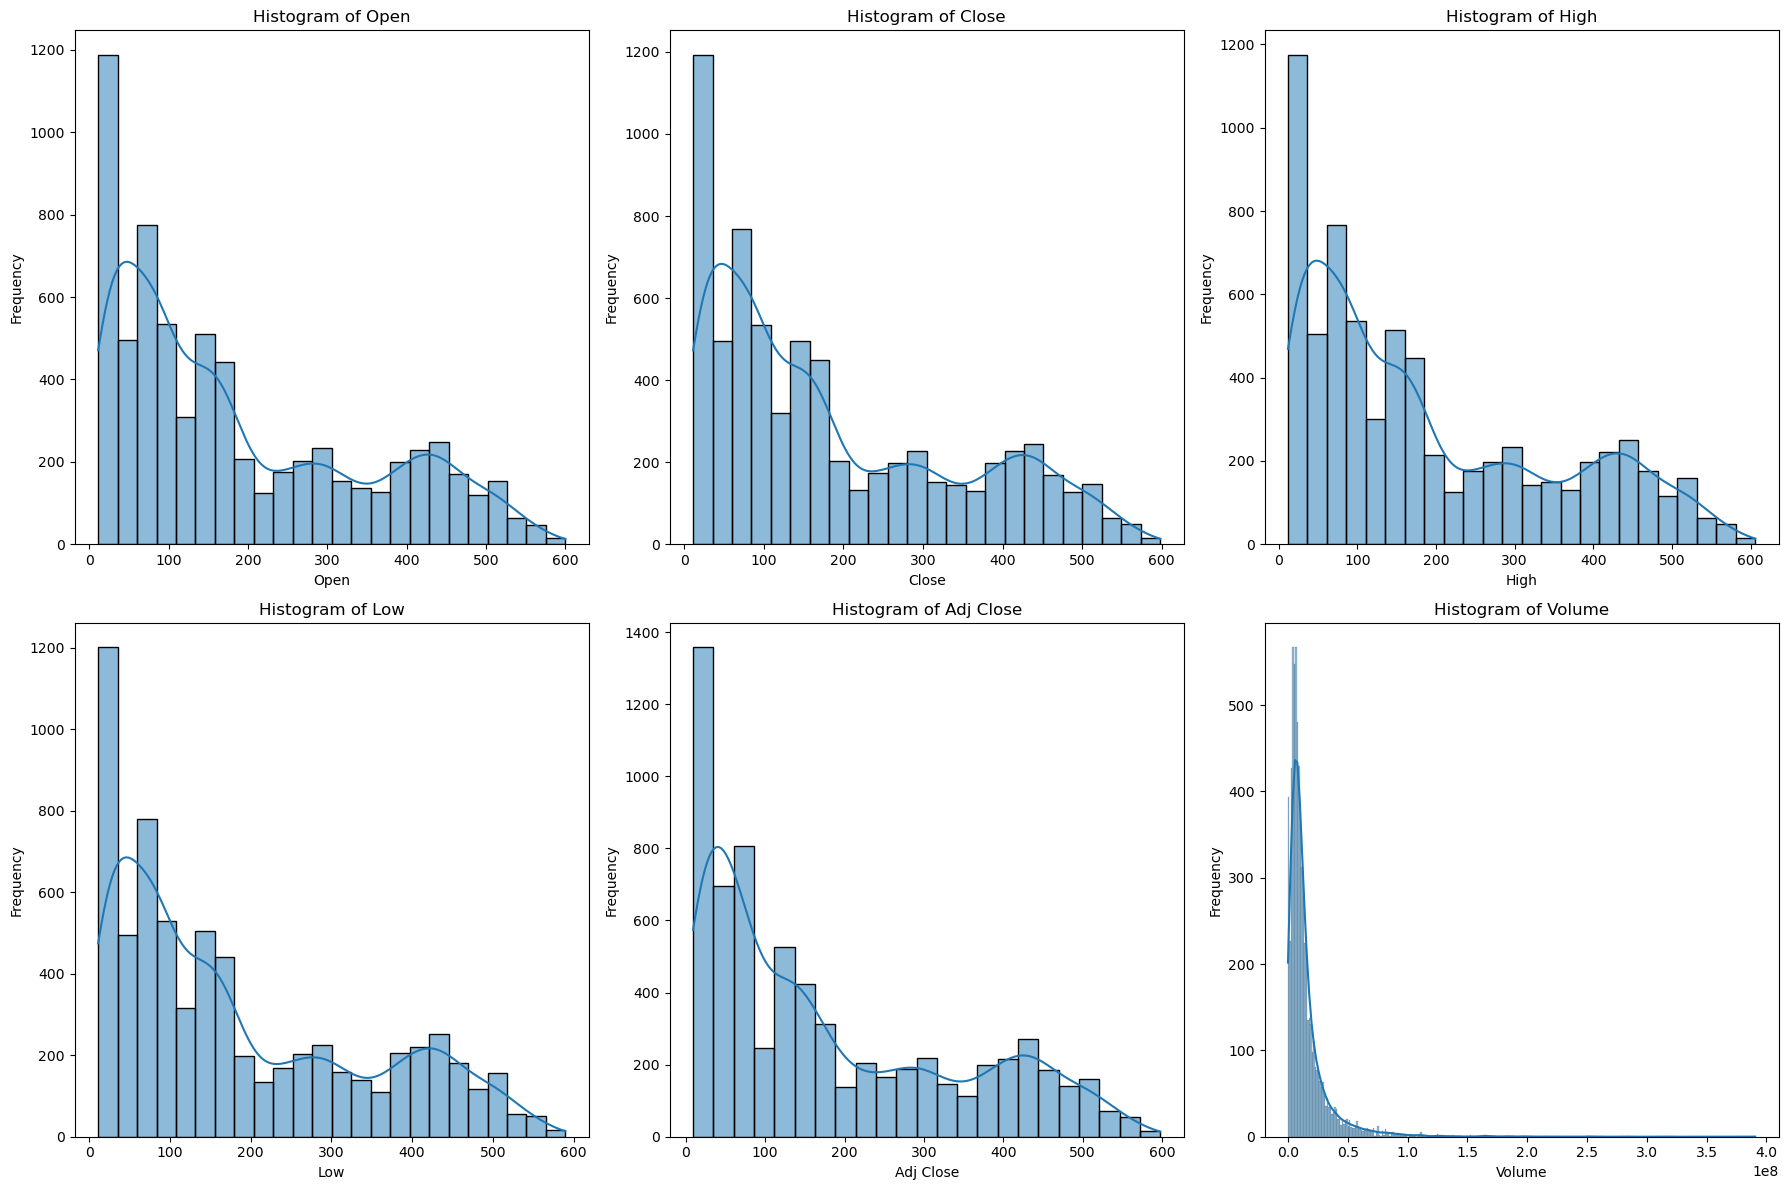

In [47]:
%matplotlib inline
#Hisotgram
plt.figure(figsize=(18, 12))
for i, column in enumerate(['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume'], 1):
    plt.subplot(2,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

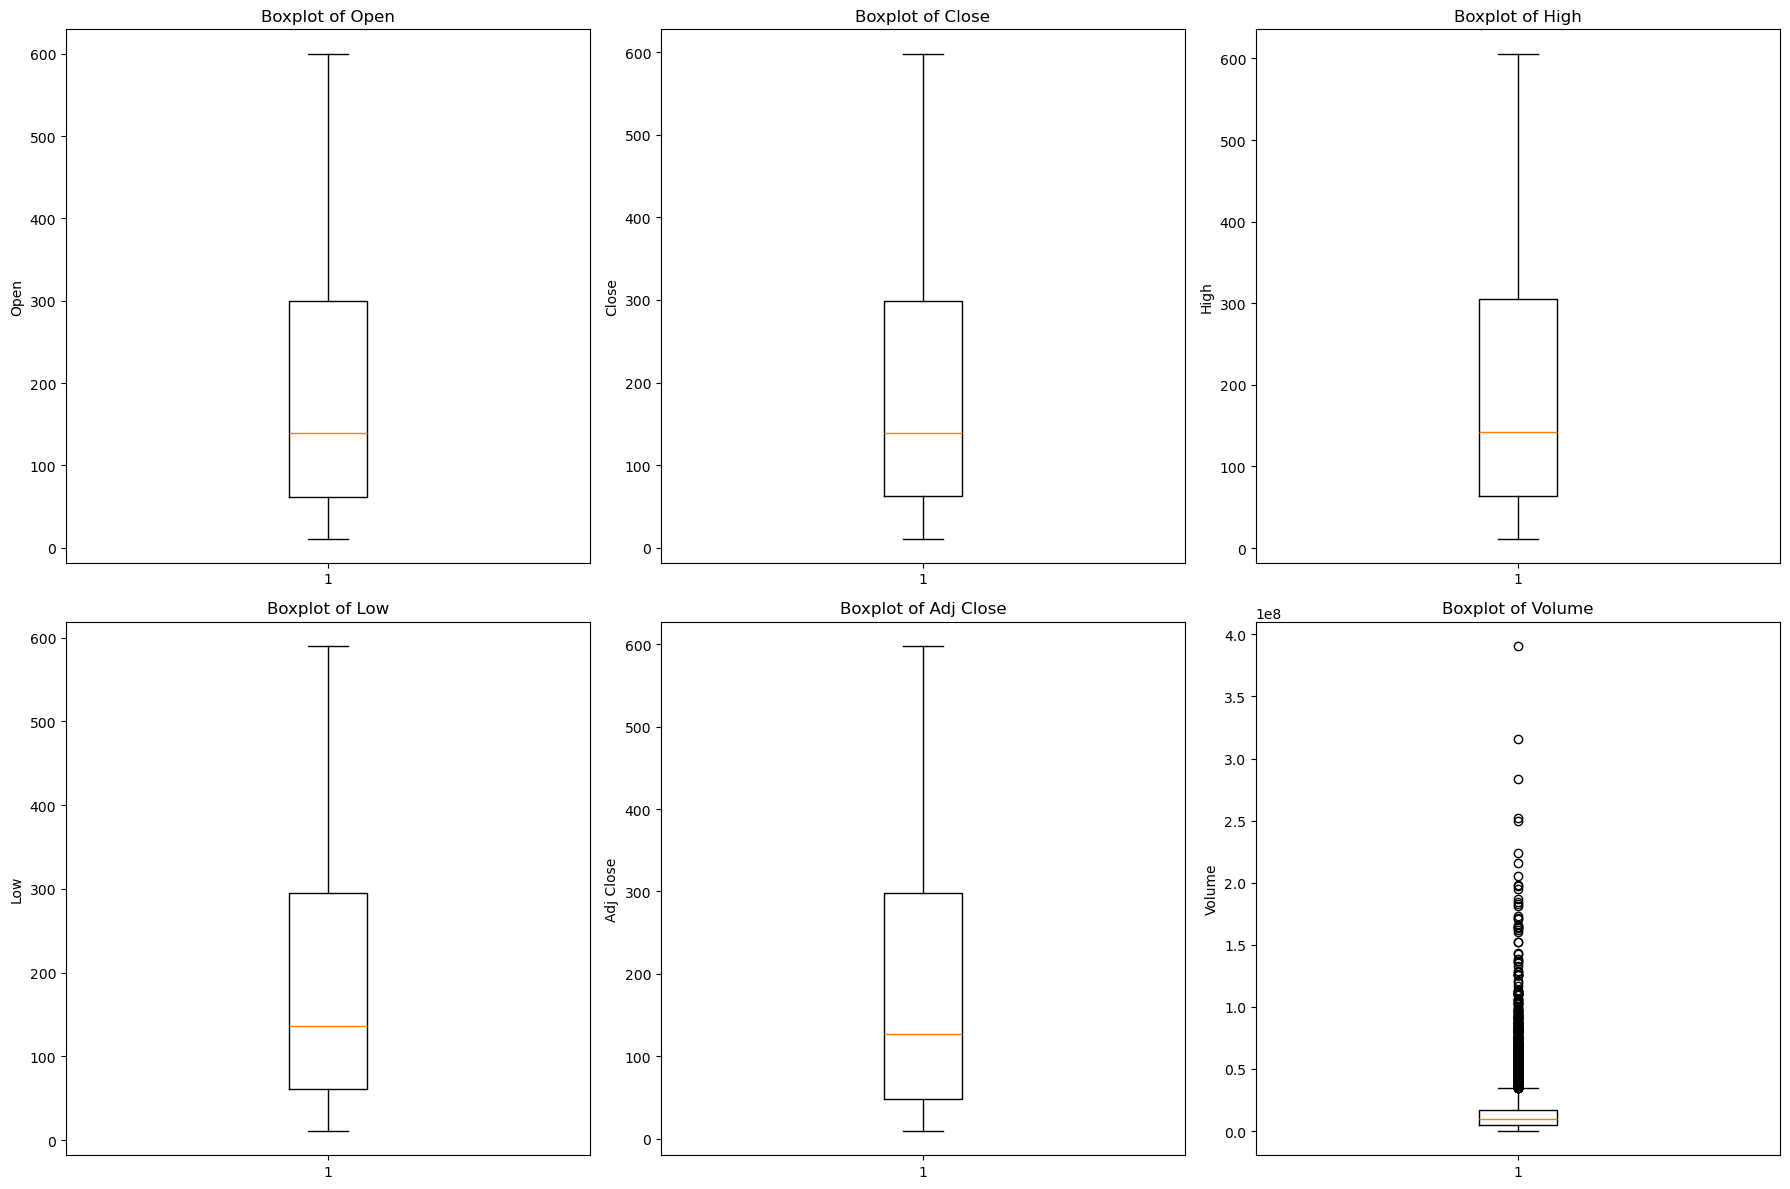

In [48]:
#BoxPlots
plt.figure(figsize=(18,12))
for i, column in enumerate(['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume'], 1):
    plt.subplot(2,3,i)
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

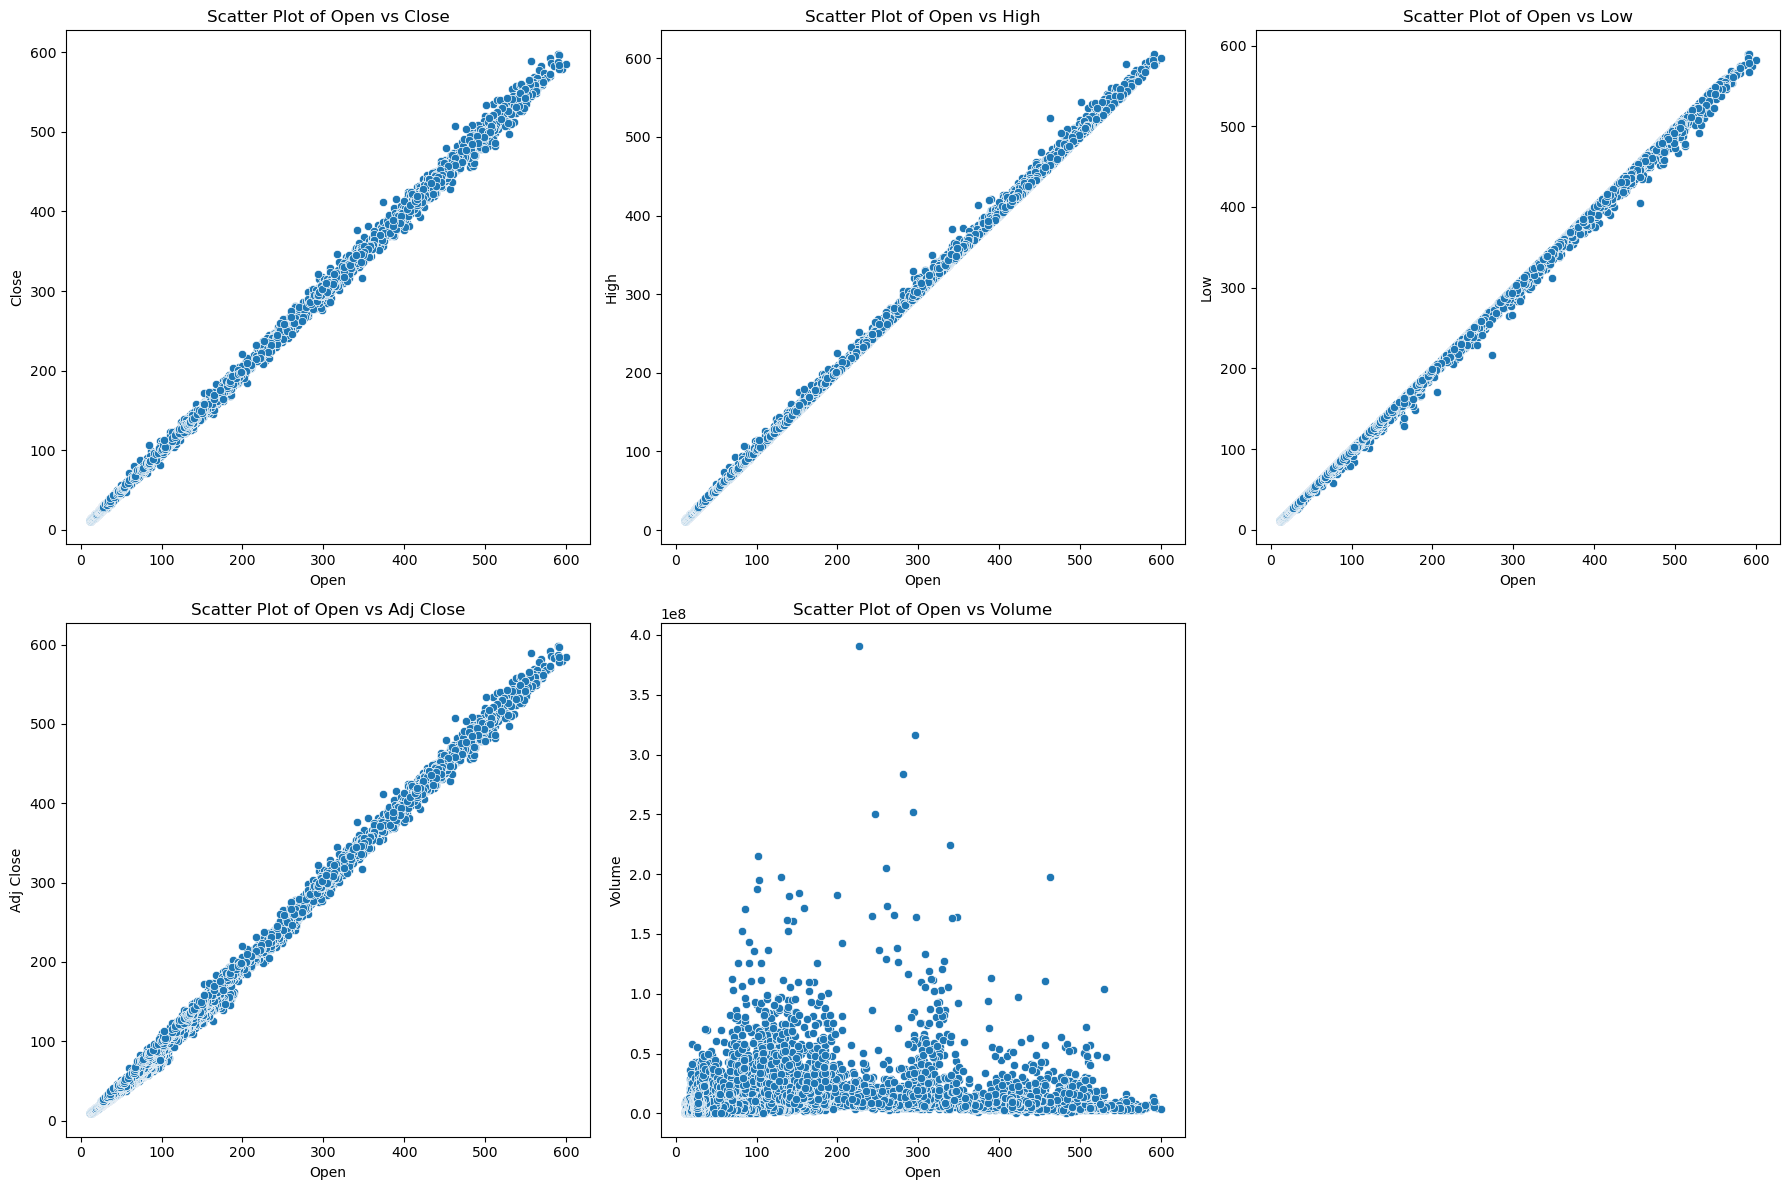

In [49]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(['Close', 'High', 'Low', 'Adj Close', 'Volume'], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df['Open'], y=df[column])
    plt.title(f'Scatter Plot of Open vs {column}')
    plt.xlabel('Open')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

**Implementing ML algorithms**

In [63]:
#For simplification purposes i am using X as "Open" column and Y as "Close" column
X = df[['Open']] 
Y = df['Close']   

In [64]:
#Let us now split the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [70]:
#Linear Regression
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)
# Make predictions
y_pred_linear = linear_model.predict(X_test)

print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred_linear))
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred_linear))

Linear Regression
Mean Squared Error: 22.2546617976128
Mean Absolute Error: 3.0117430462068713


In [72]:
#Lasso Regression
lasso_model=Lasso(alpha=0.2)
lasso_model.fit(X_train, Y_train)

#predictions
y_pred_lasso=lasso_model.predict(X_test)

print("Lasso Regression")
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred_lasso))
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred_lasso))

Lasso Regression
Mean Squared Error: 22.25544715154602
Mean Absolute Error: 3.0118603733642217


In [75]:
poly=PolynomialFeatures(degree=3)
poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train, Y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test)

print("Polynomial Regression")
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred_poly))
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred_poly))

Polynomial Regression
Mean Squared Error: 22.2546617976128
Mean Absolute Error: 3.0117430462068713


In [82]:
svr_model=SVR(kernel='rbf',C=200,gamma=0.2,epsilon=0.1)
svr_model.fit(X_train,Y_train)
y_pred_svr=svr_model.predict(X_test)
print("Support Vector Regresssor")
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred_svr))
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred_svr))


Support Vector Regresssor
Mean Squared Error: 95.02033923426728
Mean Absolute Error: 3.685001816487812


In [85]:
#Random Forest
rf=RandomForestRegressor(n_estimators=700,random_state=1)
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest Regresssor")
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred_rf))
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred_rf))

Random Forest Regresssor
Mean Squared Error: 36.167133990039076
Mean Absolute Error: 3.8680257983236896


**Using LSTM to make predictions**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM
from sklearn.preprocessing import StandardScaler
#getting data
features = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = df['Close']

# Scale the features and target
scaler_features = StandardScaler()
scaler_target = StandardScaler()

scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

print("Scaled features shape:", scaled_features.shape)
print("Scaled target shape:", scaled_target.shape)

Scaled features shape: (6857, 5)
Scaled target shape: (6857, 1)


In [53]:
def create_sequences(X, y, time_steps=5):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create sequences
time_steps = 5
X_seq, Y_seq = create_sequences(scaled_features, scaled_target, time_steps)

print("X_seq shape:", X_seq.shape)
print("Y_seq shape:", Y_seq.shape)

X_seq shape: (6852, 5, 5)
Y_seq shape: (6852, 1)


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=1)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (5481, 5, 5)
Y_train shape: (5481, 1)
X_test shape: (1371, 5, 5)
Y_test shape: (1371, 1)


In [55]:
# Define the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(time_steps, X_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

# Train the model
model.fit(X_train, Y_train, epochs=20, validation_split=0.1, verbose=1)

C:\Users\Shrinil\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100)                 │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,501 (166.02 KB)

 Trainable params: 42,501 (166.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2231 - val_loss: 0.0153
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - val_loss: 0.0145
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - val_loss: 0.0139
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - val_loss: 0.0137
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0033 - val_loss: 0.0175
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038 - val_loss: 0.0151
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028 - val_loss: 0.0133
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - val_loss: 0.0145
Epoch 9/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - val_loss: 0.0138
Epoch 10/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - val_loss: 0.0130
Epoch 11/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0178
Epoch 12/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [58]:
loss = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test Loss: {loss}")

# Make predictions
x_input = X_test[0].reshape((1, time_steps, X_seq.shape[2]))
yhat = model.predict(x_input, verbose=0)
predicted_value = StandardScaler().inverse_transform(yhat)
print(f"Predicted Value: {predicted_value}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Test Loss: 0.002496004104614258


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


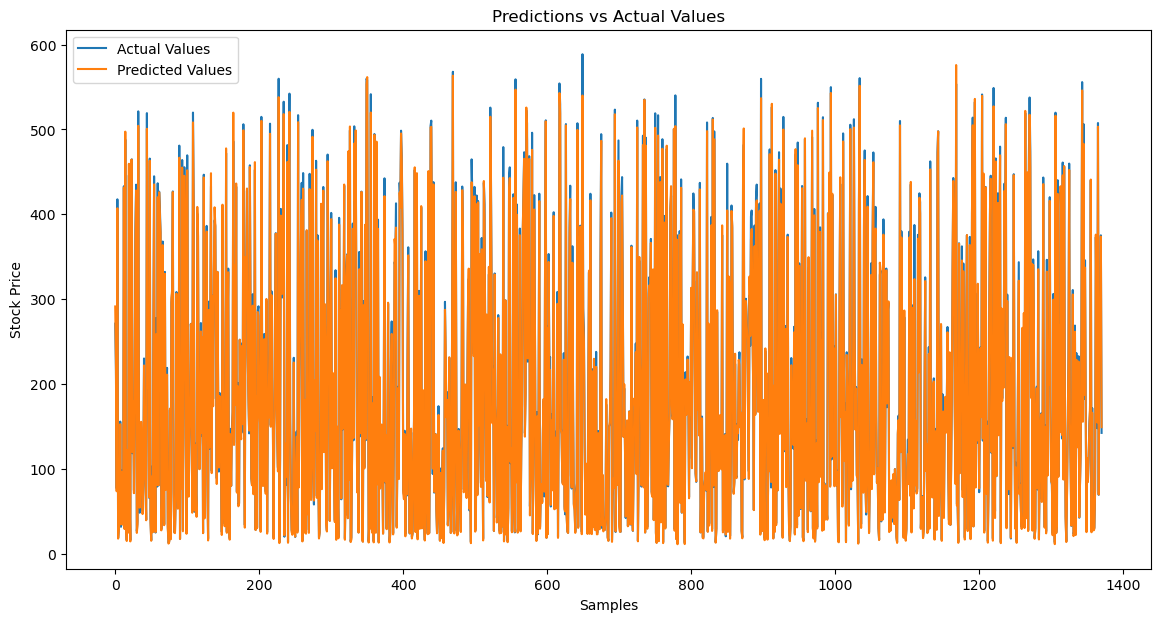

In [57]:
Y_pred = model.predict(X_test)

# Inverse transform the predicted and actual values
Y_pred_inv = scaler_target.inverse_transform(Y_pred)
Y_test_inv = scaler_target.inverse_transform(Y_test)

# Plot the predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(Y_test_inv, label='Actual Values')
plt.plot(Y_pred_inv, label='Predicted Values')
plt.title('Predictions vs Actual Values')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.legend()
plt.show()